In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
#import nltk
#from nltk.corpus import stopwords
#nltk.download('stopwords')
import spacy
#import gensim
from nlppreprocess import NLP
from tensorflow.keras.optimizers import Adam
#from gensim.parsing.preprocessing import remove_stopwords

In [2]:
#tf2.0 have to tensorflow tf doesnt work
#from keras.layers import Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import model_from_json

In [ ]:
#if tf.test.gpu_device_name(): 

#    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

#else:

#   print("Please install GPU version of TF")

In [3]:
#Read dataset.csv file
mov_revs = pd.read_csv("C:/Users/Omer/Documents/datasetsent/IMDB-Dataset.csv")
mov_revs.isnull().values.any()
mov_revs.shape
labelsent = mov_revs['sentiment']

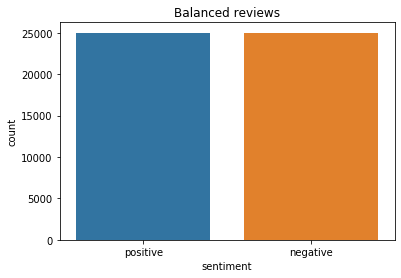

In [4]:
#Visualising the dataset if normalization is required
sns.countplot(x='sentiment', data=mov_revs).set_title("Balanced reviews")
plt.show()

In [ ]:
DATASET_ENCODING = "ISO-8859-1"
#if columns are not correctly identified in excel u can place ur own
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
twit = pd.read_csv("C:/Users/Omer/Documents/datasetsent/twittersentimentanalysis/twitanalysis.csv", encoding =DATASET_ENCODING, names=DATASET_COLUMNS)
twit.drop('ids', axis=1, inplace=True)
twit.drop('date', axis=1, inplace=True)
twit.drop('flag', axis=1, inplace=True)
twit.drop('user', axis=1, inplace=True)

In [ ]:
sns.countplot(x='target', data=twit).set_title("Balanced reviews")
plt.show()

In [ ]:
twit['text'][1]

In [ ]:
labelsentv2 = twit['target']
labelsentv2 = np.array(list(map(lambda x: 1 if x==4 else 0, labelsentv2)))

In [ ]:
#fields = ['review']

#df = pd.read_csv('data.csv', skipinitialspace=True, usecols=fields)
# See the keys
#print df.keys()
# See content in 'star_name'
#print df.star_name

In [ ]:
mov_revs.head()
#show random movie review (requires preprocessing)
#mov_revs["review"][7]

In [5]:
#have to get rid of stop words.
#stop_words = set(stopwords.words('english')) 
nlp = NLP()

In [ ]:
#Removing html tags, punctuations and numbers, spaces and single character removal
def preprocess_text(sen):
    
    sentence = remove_tags(sen)
    
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    sentence = re.sub(r'\s+', ' ', sentence)
    
    #sentence = remove_stopwords(sen)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
def remstopw(text):
    sentence = remove_stopwords(sen)
    return sentence

In [6]:
movrevised = []
sentences = list(mov_revs['review'])
for sen in sentences:
    movrevised.append(nlp.process(sen))

In [ ]:
twitrevised = []
sentencestwit = list(twit['text'])
for sen in sentencestwit:
    twitrevised.append(nlp.process(sen))

In [ ]:
twitrevised[1]

In [ ]:
movrevised[0]

In [ ]:
for x in movrevised:
    twitrevised.append(x)

In [ ]:
#Create a new list that contains all the preprocessed revised reviews
movrevised = []
sentences = list(mov_revs['review'])
#sentences = remove_stopwords(sentences)
for sen in sentences:
    movrevised.append(preprocess_text(sen))

In [ ]:
# removing stop words from preprocessed lit
movrevisedtwo = []
for sen in movrevised:
    movrevisedtwo.append(remstopw(sen))

In [ ]:
#def lemspac(text):
#    sentence = 

In [ ]:
#movrevisedthree = []
#movrevisedtwostri = ''.join(movrevisedtwo)
#len(movrevisedtwostri)

In [ ]:
movrevisedoub = [movrevisedtwo]

In [ ]:
#movrevisedoub

In [ ]:
#movrevisedtwostri
nlp = spacy.load("en")# disable = ['ner', 'parser'])
lengths = np.cumsum([0] + list(map(len, movrevisedoub)))
print(lengths)

In [ ]:
flat_words = [item for sublist in movrevisedoub for item in sublist]

In [ ]:
#flat_words

In [ ]:
doc = spacy.tokens.Doc(nlp.vocab, words=flat_words)

lemmatized = []
# Iterate starting with 1
for index in range(1, len(lengths)):
    # Slice doc as described in the first point, so [0:3] and [3:6]
    span = doc[lengths[index - 1] : lengths[index]]
    # Add lemmatized tokens as list to the list
    lemmatized.append([token.lemma_ for token in span])

#print(lemmatized)

#nlp.max_length = 38270710
#doc = nlp(movrevisedtwostri, disable = ['ner', 'parser'])
#lemma_word1 = [] 
#for token in doc:
#    movrevisedthree.append(token.lemma_)

In [ ]:
flat_wordslem = [item for sublist in lemmatized for item in sublist]

In [ ]:
#Shows the revised review after preprocessing
movrevised[0]

In [ ]:
#Shows the revsed review after preprocessing stopwords
movrevisedtwo[30]

In [ ]:
flat_wordslem[0]

In [ ]:
#len(movrevised[7])

In [7]:
#Converting sentiment labels into 1 and 0 where 1 is positive and 0 is negative
labelsent = np.array(list(map(lambda x: 1 if x=="positive" else 0, labelsent)))
#labelsentv3 = np.concatenate((labelsentv2, labelsent), axis=None)
#encoded_labels = [1 if labelsent =='positive' else 0, labelsent]
#encoded_labels = np.array(encoded_labels)

In [ ]:
labelsentv3

In [8]:
#Train(80)/test(20)split
X_train, X_test, y_train, y_test = train_test_split(movrevised, labelsent, test_size=0.20, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(twitrevised, labelsentv3, test_size=0.20, random_state=42)

In [ ]:
X_test.shape

In [9]:
#Using keras tokenizer to tokenize our train and test sets.
#maxlen = 200
max_features = 50000
tokenizer = Tokenizer(num_words=max_features, oov_token=None)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
#print(X_train)

In [10]:
#Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

#maxlen is changeable based on the review lengths
maxlen = 100

#Padding reviews that are less than maxlen so it reaches the limit
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
#vocab_size
#tokenizer.word_index.shape
#word_index = {w: i for i, w in enumerate(embeddings_dictionary.keys(), 1)}

In [ ]:
#create embedding matrix
#embedding_matrix = np.zeros((len(word_index) + 1, dims))
#for word, i in word_index.items():
#    embedding_vector = embeddings_dictionary.get(word)
#    if embedding_vector is not None:
#        # words not found in embedding index will be all-zeros.
#        embedding_matrix[i] = embedding_vector[:dims]

In [ ]:
#def texts_to_sequences(texts, word_index):
#    for text in texts:
#        tokens = text_to_word_sequence(text)
#        yield [word_index.get(w) for w in tokens if w in word_index]

#X_train = texts_to_sequences(X_train, word_index)
#X_test = texts_to_sequences(X_test, word_index) 

In [ ]:
#X_train

In [ ]:
#Adding 1 because of reserved 0 index
#vocab_size = len(word_index) + 1

#maxlen is changeable based on the review lengths
#maxlen = 200
#pad_sequences(list(review_token_idx)
#Padding reviews that are less than maxlen so it reaches the limit
#list(X_train) = pad_sequences(list(X_train), padding='post', maxlen=maxlen)
#list(X_test) = pad_sequences(list(X_test), padding='post', maxlen=maxlen)

In [11]:
#Using GloVe embeddings to create our feature matrix
embeddings_dictionary = dict()
dims = 100
#glove_data = 'C:/Users/Omer/Documents/datasetsent/glove_embedding/glove.42B.'+str(dims)+'d.txt'
glove_data = 'C:/Users/Omer/Documents/datasetsent/glove_embedding/glove.6B.'+str(dims)+'d.txt'
glove_file = open(glove_data, encoding="utf8")
#glove_file = open('C:/Users/Omer/Documents/datasetsent/glove_embedding/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [12]:
#Embedding matrix that maps each word in the review if present to the glove embeddings
#index=1000
embedding_matrix = np.zeros((vocab_size, 100)) #.astype(object)
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
# Creating callbacks to avoid model overfitting and saving the best model
#filepath = "sentmlmodel.hdf5"
#callbacks = [EarlyStopping(monitor='val_loss', patience=5),
#             ModelCheckpoint(filepath), save_best_only=True,save_weights_only=False)]

In [ ]:
#def get_last_layer_units_and_activation(num_classes):
#    if num_classes == 2:
#        activation = 'sigmoid'
#        units = 1
#    else:
#        activation = 'softmax'
#        units = num_classes
#    return units, activation

In [13]:
DROPOUT_RATE = 0.5
#UNITS = 64
#NUM_CLASSES = 2
#LAYERS = 2
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
#input_shape = X_train.shape[1:]
opt = Adam(learning_rate=2e-5)

In [ ]:
# Compile model with parameters
#if NUM_CLASSES == 2:
#    loss = 'binary_crossentropy'
#else:
#    loss = 'sparse_categorical_crossentropy'

In [14]:
#128 neuron lstm where weights are from embedding
#LEARNING_RATE = 1e-3

model = Sequential()
#embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
embedding_layer = Embedding(vocab_size, 100, input_length=maxlen)
model.add(embedding_layer)
#model.add(Dropout(rate=DROPOUT_RATE))
#model.add(Bidirectional(LSTM(128)))
model.add(LSTM(128,dropout=0.5))
#model.add(LSTM(128))
#model.add(Dropout(rate=DROPOUT_RATE))
model.add(Dense(1, activation='sigmoid'))
#optimizer = sigmoid
#optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          9257600   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 9,374,977
Trainable params: 9,374,977
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#model = nlp_model("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1")

In [15]:
#Training our model and creating a validation set of training.
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2,callbacks=callbacks)
#Testing model with test sets
score = model.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 79s 2ms/sample - loss: 0.6930 - acc: 0.5121 - val_loss: 0.6927 - val_acc: 0.5232
Epoch 2/10
32000/32000 [==============================] - 79s 2ms/sample - loss: 0.6920 - acc: 0.5422 - val_loss: 0.6915 - val_acc: 0.5661
Epoch 3/10
32000/32000 [==============================] - 68s 2ms/sample - loss: 0.6541 - acc: 0.6242 - val_loss: 0.5515 - val_acc: 0.7324
Epoch 4/10
32000/32000 [==============================] - 67s 2ms/sample - loss: 0.5068 - acc: 0.7531 - val_loss: 0.4550 - val_acc: 0.7889
Epoch 5/10
32000/32000 [==============================] - 69s 2ms/sample - loss: 0.4368 - acc: 0.8006 - val_loss: 0.4102 - val_acc: 0.8179
Epoch 6/10
32000/32000 [==============================] - 69s 2ms/sample - loss: 0.3929 - acc: 0.8290 - val_loss: 0.3814 - val_acc: 0.8336
Epoch 7/10
32000/32000 [==============================] - 77s 2ms/sample - loss: 0.3614 - acc: 0.8457 - val_loss: 0.3

In [ ]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

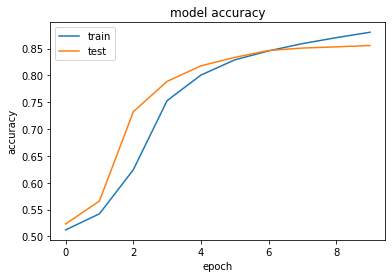

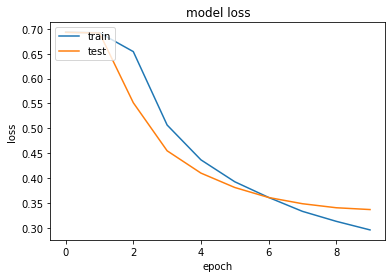

In [16]:
#plotting model history
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
index = 32
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is  : {df["sentiment"][index]}')
print('='*70)
pro = predict_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'predicted sentiment is {status} with a probability of {pro}')

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("C:/Users/Omer/Documents/datasetsent/model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("C:/Users/Omer/Documents/datasetsent/model.h5")
print("Saved model to disk")

In [ ]:
# load json and create model
json_file = open('C:/Users/Omer/Documents/datasetsent/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("C:/Users/Omer/Documents/datasetsent/model.h5")
print("Loaded model from disk")
 


In [ ]:
# evaluate loaded model on test data
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
loaded_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
#For a single user review 3 is negative and 1 is positive
#custom lists
instance = flat_wordslem[3]
#neglist = ['this machine learning algorithm sucks and is awful']
#poslist = ['nah lstms are pretty cool']
#instance = list(neglist)
#movrevised[57]
#print(instance)

In [ ]:
emptyli = []
for sen in instance:
    emptyli.append(preprocess_text(sen))

instance = tokenizer.texts_to_sequences(emptyli)   

In [ ]:
emptyli

In [ ]:
#Create a new list that contains all the preprocessed revised reviews
#movrevised = []
#sentences = list(mov_revs['review'])
#for sen in sentences:
#    movrevised.append(preprocess_text(sen))

In [ ]:
instance2 = ['today was a quiet rainy. This terrible weather has quiet put off my mood to go outside.']
instance = list(instance2)

In [ ]:
#Preprocess the review.
#instance = []
#sentences = list(mov_revs['review'])
#for sen in sentences:
#    instance.append(preprocess_text(sen))
 

    
#tokenize instance
#instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]
#pad instance based on maxlen
instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)



In [ ]:
lstm_pred = model.predict(instance)
lstm_ropre = np.round(lstm_pred,2)
lstm_ropre = np.squeeze(lstm_ropre)

In [ ]:
# Adding 1 because of reserved 0 index
#vocab_size = len(tokenizer.word_index) + 1
#maxlen = 100

In [ ]:
#embedding_matrix = zeros((vocab_size, 100))
#for word, index in tokenizer.word_index.items():
#    embedding_vector = embeddings_dictionary.get(word)
#    if embedding_vector is not None:
#        embedding_matrix[index] = embedding_vector

In [ ]:
print('Prediction value before rounding:',lstm_pred)

In [ ]:
print('Prediction value after rounding:',lstm_ropre)

In [ ]:
#Response to differentiate if it is a positive or negative review
    if(lstm_ropre==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")
        